# Seguimiento de partículas en un fluido

**Objetivo**.

Mediante la aplicación del método de Euler, genere una visualización como la que se muestra en el video y responda las preguntas del quiz "Seguimiento Lagranfiano de partículas".

**Descripción**.

Si soltamos varias partículas en un flujo, dichas partículas seguirán la dirección del movimiento y delinearán varias trayectorias como se oberva en el siguiente video:
<video src="./Figuras/part_track.mp4" width="500" controls></video>
Si pudieramos definir la velocidad de un fluido y un conjunto inicial de partículas **¿cómo podríamos calcular las trayectorias de las partículas dentro del flujo?**

**<font color="crimson">Siempre es importante inicializar el ambiente</font>** (ejecute la siguiente celda)

In [1]:
# Inicialización del ambiente
%run "init.ipynb"

# Importamos las bibliotecas
import matplotlib.pyplot as plt
import numpy as np
from time import time
from macti_lib.visual import plotFlujo, plotMalla

### Paso 1. Modelo matemático

Si definimos $\vec{X} \equiv (x, y)$ como la posición de una partícula y $\vec{V} \equiv (u, v)$ como su velocidad, podemos escribir un PVI *vectorial en 2D* como sigue:

$$
\begin{eqnarray}
\dfrac{d \vec{X}}{dt} & = & \vec{V}(t, \vec{X}) \qquad \text{para} \quad 0 < t < N_t \\
\vec{X}(t=0) & = & (x^0, y^0) \qquad \text{(condición inicial)}
\end{eqnarray}
$$

donde $(x, y) \in [0, Lx] \times [0, Ly]$ y $\vec{X}(t=0)$ representa la posición inicial de una partícula.

El PVI anterior se puede separar por componentes:

$$
\begin{array}{ccc|cccc}
\dfrac{d x}{dt} & = & u(t, \vec{X}) \qquad & \qquad 
\dfrac{d y}{dt} & = & v(t, \vec{X}) \qquad & \text{para} \quad 0 < t < N_t \\
x(t=0) & = & x^0 \qquad & \qquad 
y(t=0) & = & y^0 \qquad & \text{(condición inicial)}
\end{array}
$$

Entonces, para calcular la posición de un partícula, debemos resolver los dos PVI descritos antes. Para ello usaremos el **Metodo de Euler** (hacia adelante).

### Paso 2. Definición del dominio de estudio.

Definimos un dominio de tamaño $L_x = 3.0$ y $L_y=1.0$ y una malla de tamaño $N_x=30$ y $N_y=15$.

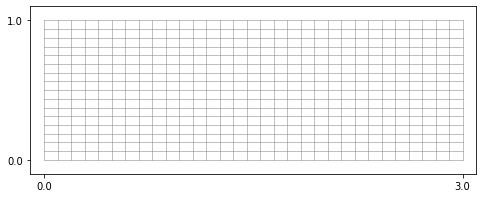

In [2]:
#Tamaño del domuinio
ax, bx = (0, 3.0) # Lx
ay, by = (0, 1.0) # Ly

# Definición de la malla
Nx = 30
Ny = 15
x = np.linspace(ax,bx,Nx+2)
y = np.linspace(ay,by,Ny+2)
xg, yg = np.meshgrid(x, y, indexing='ij', sparse=False)

# Graficación de la malla
fig = plt.figure(figsize=(8,4))
plotMalla(xg, yg, marker='')

### Paso 3. Definición del flujo.

Vamos a usar el siguiente campo de velocidad $\vec{V}(t, \vec{X}) = (u, v)$:

$$
\begin{eqnarray}
u & = & -\cos(\alpha \pi y) \sin(\alpha \pi x) +  \cos(\alpha \pi x)\\
v & = & \sin(\alpha \pi y) \cos(\alpha \pi x)
\end{eqnarray}
$$

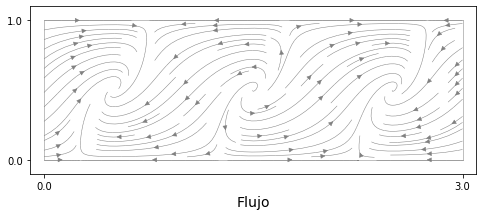

In [3]:
# Parámetros para el campo de velocidad.
α = 1.0
u = lambda x, y: -np.cos(α * np.pi * y) * np.sin(α * np.pi * x) + np.cos(α * np.pi * x)
v = lambda x, y:  np.sin(α * np.pi * y) * np.cos(α * np.pi * x) 

# Graficación del flujo
fig = plt.figure(figsize=(8,4))
plotFlujo(xg, yg, u, v, 'stream', 'Flujo')

### Paso 4. Posición inicial de las partículas.

Definimos una serie de partículas dentro del flujo.

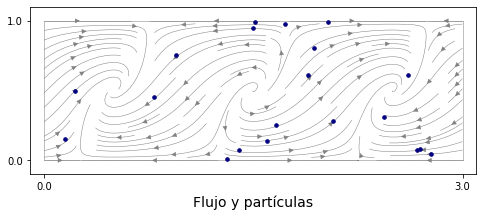

In [4]:
# Transformación lineal
f = lambda x, a, b: (b-a)*x + a 

# Número de partículas
N = 20

# Generación de partículas de manera aleatoria
### BEGIN SOLUTION
np.random.seed(int(time()))
coord = np.random.rand(N,2)
coord[:,0] = f(coord[:,0], ax, bx) # Transformación hacia el dominio de estudio
coord[:,1] = f(coord[:,1], ay, by) # Transformación hacia el dominio de estudio
### END SOLUTION

# Graficación de  las partículas y del flujo
fig = plt.figure(figsize=(8,4))
plt.scatter(coord[:,0],coord[:,1],marker='.',color='navy',s=50, alpha=1.00, zorder=20)

plotFlujo(xg, yg, u, v, 'stream', 'Flujo y partículas')

### Paso 5. Modelo numérico.

Los PVI definidos para calcular las coordenadas de las partículas, se pueden resolver numéricamente usando la **fórmula de Euler hacia adelante** como sigue:

$$
\begin{array}{ccl|ccl}
x(t=0)  & = & x^0 \qquad & \qquad
y(t=0)  & = & y^0 \qquad \\
x^{n+1} & = & x^{n} + h_t * u (x^{n}, y^{n}) \qquad & \qquad 
y^{n+1} & = & y^{n} + h_t * v (x^{n}, y^{n}) \\
\end{array}
$$

para $n = 1, \dots, N_t$ y donde $(x^{n+1}, y^{n+1})$ representa la posición de la partícula en el instante $n+1$.

En ambos casos se requiere del Método de Euler por lo tanto implementamos una función general para hacer este cálculo como sigue:

In [5]:
# Implemente el método de Euler en una función:
# def euler(x, v, h)
#    ...
### BEGIN SOLUTION
def euler(x, v, h):
    return x + h * v
### END SOLUTION

### Paso 6. Integración de todo el código.

Ahora podemos integrar todo el código realizado hasta ahora para calcular la trayectoria de las partículas.

**Hint**: Debe realizar un doble ciclo similar al siguiente:
```python
# Ciclo temporal para calcular cada posición.
for n in range(1,Nt+1):
    for i in range(0,N):
    ...
```

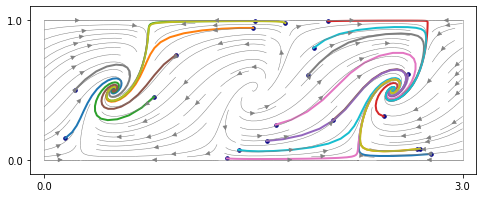

In [6]:
# Parámetros para el modelo numérico
Nt = 50  # Número de pasos en el tiempo
ht = 0.1 # Tamaño del paso de tiempo

# Arreglos para almacenar las N partículas en Nt pasos de tiempo
xn = np.zeros((N,Nt+1))
yn = np.zeros((N,Nt+1))

# Inicialización
for i in range(0,N):
    xn[i, 0] = coord[i,0]
    yn[i, 0] = coord[i,1]

# Implementación del método de euler para ambas coordenadas
### BEGIN SOLUTION
for n in range(1,Nt+1):
    for i in range(0,N):
        xi = xn[i,n-1]
        yi = yn[i,n-1]
        xn[i,n] = euler(xi, u(xi,yi), ht)
        yn[i,n] = euler(yi, v(xi,yi), ht)
### END SOLUTION

fig = plt.figure(figsize=(8,4))

for i in range(0,N):
    plt.scatter(xn[i,0], yn[i,0], marker = '.', color='navy', s = 50, alpha=0.95, zorder=0)
    plt.plot(xn[i,:], yn[i,:], lw=2.0)

plotFlujo(xg, yg, u, v, 'stream', '')

### Paso 6. Creación de una animación.

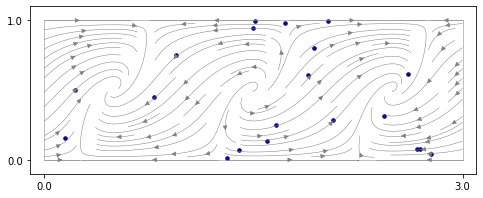

In [7]:
# Importamos la biblioteca para realizar la animación
from matplotlib.animation import FuncAnimation

# Función para actualizar los gráficos.
def update_lines(t, lines, x, y):
    for i,line in enumerate(lines):
        line[0].set_data(x[i,0:t], y[i,0:t])

# Inicialización del primer cuadro de la animación
fig = plt.figure(figsize=(8,4))
#plt.plot(xn[:,0], yn[:,0], '.', lw = 2.0, zorder=20)
plt.scatter(xn[:,0], yn[:,0], marker = '.', color='navy', s = 50, alpha=0.95, zorder=0)
lines = [plt.plot(xn[i,0], yn[i,0], lw=2.0) for i in range(N)]

# Creación del objeto de animación
line_ani = FuncAnimation(plt.gcf(),     # Obtiene la figura actual
                         update_lines,  # Función que actualiza la figura.
                         Nt,            # Número de pasos en el tiempo.
                         fargs=(lines, xn, yn), # Argumentos para update_lines().
                         interval=2000,  # Tiempo en milisegundos.
                         repeat=False)  # Repetición de la animación en ciclo.
plotFlujo(xg, yg, u, v, 'stream')

In [8]:
from IPython.display import HTML
HTML(line_ani.to_jshtml())

Para crear un video en formato MP4, implemente el siguiente código:

```python
# Guardamos la animación en un video en formato MP4
# ESTO PUEDE TARDAR UN POCO
from matplotlib.animation import writers
Writer = writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800)
line_ani.save('part_track.mp4', writer=writer)
```

In [ ]:
# Guardamos la animación en un video en formato MP4
# ESTO PUEDE TARDAR UN POCO
### BEGIN SOLUTION
from matplotlib.animation import writers
Writer = writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=-1)
line_ani.save('part_track.mp4', writer=writer)
### END SOLUTION

In [ ]:
# Mostramos el video de la animación final:
from IPython.display import Video
Video('part_track.mp4', height=300)#, width=500)

<a name='ej-1'></a>
#### **<font color="SlateBlue">Ejercicio 1.</font>**

- <font color="Navy">Modifique el número de partículas hasta obtener un resultado similar al del video inicial.</font>
- <font color="Navy">Modifique el paso de tiempo $h_t$ hasta que las trayectorias se vean suaves y ya no cambien mucho con una disminución posterior de este parámetro.</font>
- <font color="Navy">Sustituya el campo de flujo por el siguiente y realice todo el proceso:</font>
```python
u = lambda x,y : 1*((-1/2 + 5*x**4) - 2*x*(1-x/2+x**5+y**3)) * np.exp(-x**2-y**2)
v = lambda x,y : (3*y**2 - 2*x*(1-x/2+x**5+y**3)) * np.exp(-x**2-y**2)
```

Para este caso el dominio será $(ax, bx) = (-3.0, 3.0)$ y $(ay, by) = (-3.0, 3.0)$. La malla tendrá un tamaño de $Nx, Ny = 30, 30$. Ud. deberá obtener algo similar a lo que se muestra en la siguiente figura:

 <table>
  <tr>
    <td><img src="./Figuras/flujo_y_part.png"  width='400px'/></td>
    <td><img src="./Figuras/flujo_y_tray.png"  width='400px'/></td>
  </tr>
</table> 